## Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate synthetic data

In [ ]:
num_samples = 1000
x1 = np.random.uniform(-5, 5, num_samples)
x2 = np.random.uniform(-5, 5, num_samples)
x3 = np.random.uniform(-5, 5, num_samples)
y = np.sin(x1) + np.cos(x2) + np.tanh(x3) + 0.1 * np.random.randn(num_samples)
X = np.column_stack((x1, x2, x3))
Y = y.reshape(-1, 1)

## Initialize weights and biases

In [ ]:
input_size = 3
hidden1 = 10
hidden2 = 10
output_size = 1
W1 = np.random.randn(input_size, hidden1) * 0.1
b1 = np.zeros((1, hidden1))
W2 = np.random.randn(hidden1, hidden2) * 0.1
b2 = np.zeros((1, hidden2))
W3 = np.random.randn(hidden2, output_size) * 0.1
b3 = np.zeros((1, output_size))

## Training parameters

In [ ]:
epochs = 1000
learning_rate = 0.01
loss_history = []

In [ ]:
for epoch in range(epochs):
    # Forward pass
    Z1 = np.einsum('ij,jk->ik', X, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.einsum('ij,jk->ik', A1, W2) + b2
    A2 = np.tanh(Z2)
    Z3 = np.einsum('ij,jk->ik', A2, W3) + b3
    A3 = Z3  # Linear output

    # Compute loss (Mean Squared Error)
    loss = np.mean((A3 - Y) ** 2)
    loss_history.append(loss)

    # Backpropagation
    dZ3 = (A3 - Y) / num_samples  # Gradient of MSE Loss
    dW3 = np.einsum('ij,ik->jk', A2, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = np.einsum('ij,jk->ik', dZ3, W3.T)
    dZ2 = dA2 * (1 - np.tanh(Z2) ** 2)  # Derivative of tanh
    dW2 = np.einsum('ij,ik->jk', A1, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.einsum('ij,jk->ik', dZ2, W2.T)
    dZ1 = dA1 * (1 - np.tanh(Z1) ** 2)  # Derivative of tanh
    dW1 = np.einsum('ij,ik->jk', X, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Gradient descent update
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.5f}')

Epoch 0, Loss: 1.86754
Epoch 100, Loss: 1.56535
Epoch 200, Loss: 1.07477
Epoch 300, Loss: 1.02456
Epoch 400, Loss: 1.02033
Epoch 500, Loss: 1.01702
Epoch 600, Loss: 1.01409
Epoch 700, Loss: 1.01148
Epoch 800, Loss: 1.00913
Epoch 900, Loss: 1.00702


## Plot the loss curve

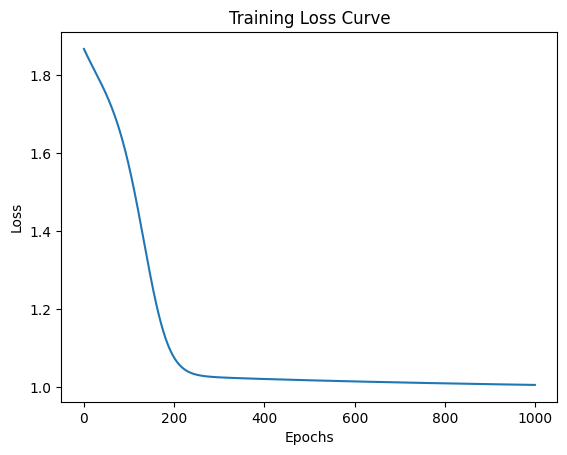

In [ ]:
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()



## Visualizing the 4D Data

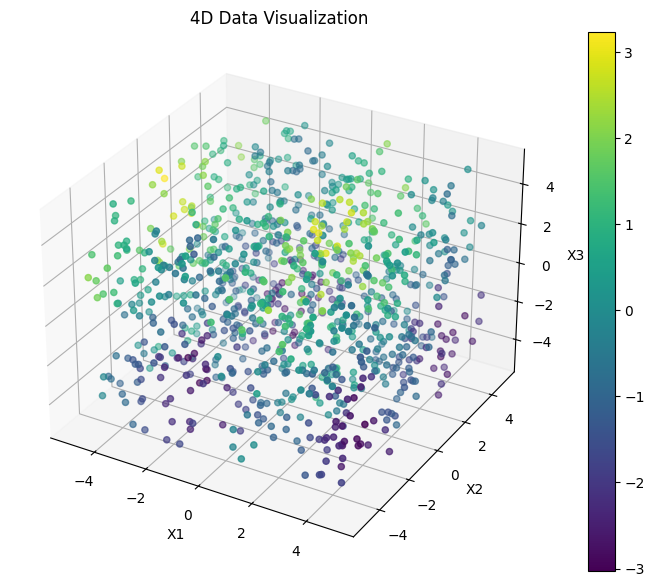

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y.flatten(), cmap='viridis')
plt.colorbar(sc)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('4D Data Visualization')
plt.show()